<a href="https://colab.research.google.com/github/jaideep99/ML-Assignment/blob/master/MLab10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import random
import scipy
from scipy.stats import norm
import matplotlib.pyplot as plt

random.seed(1)

Question 1:
Rolling Dice Problem

In [2]:
def dice(prob=None):
    if not prob:
        return np.random.choice(a=[1,2,3,4,5,6])
    else:
        return np.random.choice(a=[1,2,3,4,5,6],p=prob)
           
def move(n=100,prob=None):
    reach=0
    for _ in range(n):
        throws=250
        pos=0
        while throws:
            throws-=1
            curr=dice(prob)
            if pos>60:
                reach+=1
                break
                
            if curr in {1,2}:
                pos-=1
            elif curr in {3,4,5}:
                pos+=1
            else:
                curr=dice(prob)
                pos+=curr
    print(reach/n)

#without biased probabilties
move() 
move(prob=[0.2,0.3,0.2,0.1,0.1,0.1]) 

#with biased probabilities
move(500)
move(500,[0.2,0.3,0.2,0.1,0.1,0.1])

1.0
0.27
1.0
0.32


Question 2:


Generating data for multiple linear regression, Logistic regression, kmeans clustering is done in each class with generate data function.


Question 3 and 4

`oops is also applied`

Linear Regression with Gradient Descent


In [0]:
class Regression_Gradient:

  def __init__(self):
    pass

  def generatedata(self,a,b,c):
    x = norm.rvs(0,1,200)
    z = norm.rvs(1,2,200)
    eps = norm.rvs(0,0.5,200)
    y = c+(a*x)+(b*z)+eps

    self.x = x
    self.z = z
    self.y = y

  def fit(self,lr=0.05):
    #weight and bias
    self.w1 = 0
    self.w2 = 0
    self.b = 0

    for xs,zs,ys in zip(self.x,self.z,self.y):
      
      yp = (self.w1*xs)+(self.w2*zs)+self.b

      gw1 = -2*(xs*(ys-yp))
      gw2 = -2*(zs*(ys-yp))
      gb = -2*(ys-yp)

      self.w1 = self.w1-(lr*gw1)
      self.w2 = self.w2-(lr*gw2)
      self.b = self.b-(lr*gb)

    return self.w1,self.w2,self.b

  def predict(self,X):

      x1 = X[0]
      x2 = X[1]
      
      pred = [self.b+(self.w1*xs)+(self.w2*zs) for xs,zs in zip(x1,x2)]

      return pred



In [6]:
model = Regression_Gradient()

model.generatedata(0.5,0.7,-1)

model.fit()

(0.33009420203511675, 0.8259399161303942, -0.6855216999729464)

In [7]:
model.predict([[0.3,0.4,0.5],[1.3,1.7,1.8]])

[0.48722845160710115, 0.8506138382627704, 0.9662172500793216]

Linear Regression With L1 and L2 Regularization

In [0]:
class Linear_Gradient_Regularization:

  def __init__(self):
    pass

  def generatedata(self,a,b,c):
    x = norm.rvs(0,1,200)
    z = norm.rvs(1,2,200)
    eps = norm.rvs(0,0.5,200)
    y = c+(a*x)+(b*z)+eps

    self.x = x
    self.z = z
    self.y = y

  def fit(self,lr=0.05,L1=0.05,L2=0.01):
      self.w1 = 0
      self.w2 = 0
      self.b = 0

      for xs,zs,ys in zip(self.x,self.z,self.y):
        
        yp = (self.w1*xs)+(self.w2*zs)+self.b

        gw1 = -2*(xs*(ys-yp))
        gw2 = -2*(zs*(ys-yp))
        gb = -2*(ys-yp)

        gw1 = gw1+(L1*1)+(L2*(self.w1*2))
        gw2 = gw2+(L1*1)+(L2*(self.w2*2))

        self.w1 = self.w1-(lr*gw1)
        self.w2 = self.w2-(lr*gw2)
        self.b = self.b-(lr*gb)

      return self.w1,self.w2,self.b

  def predict(self,X):
      
      x1 = X[0]
      x2 = X[1]

      pred = [self.b+(self.w1*xs)+(self.w2*zs) for xs,zs in zip(x1,x2)]

      return pred
    


In [13]:
model = Linear_Gradient_Regularization()

model.generatedata(0.6,0.8,-2)

model.fit(0.05,0.05,0.01)

(0.6398785619711809, 0.959741054788461, -2.0507760523629246)

In [14]:
model.predict([[0.3,0.4,0.5],[1.3,1.7,1.8]])

[-0.6111491125465709, -0.16326483443406858, -0.0033028727581043693]

Logistic Regression

In [0]:
class LogisticRegression:
  random.seed(1)
  def __init__(self):
    pass

  def sigmoid(self,x,m,c):
    return (1/(1+np.exp(-(x*m+c))))
  
  def generatedata(self,m,c):
    self.x = norm.rvs(0,1,200)
    self.y = self.sigmoid(self.x,m,c)


  def fit(self,lr=0.01):

    self.w = 0
    self.b = 0

    for xs,ys in zip(self.x,self.y):
      
      yp = self.sigmoid(xs,self.w,self.b)

      #gradients
      gw = xs*(yp-ys)
      gb = (yp-ys)

      self.w = self.w - (lr*gw)
      self.b = self.b - (lr*gb)

    return self.w,self.b

  def predict(self,X):
    yp = []
    for ys in X:
      ys = self.sigmoid(ys,self.w,self.b)
      if(ys<0.5):
        yp.append(0)
      else:
        yp.append(1)

    return yp


In [0]:
model = LogisticRegression()

model.generatedata(0.5,1)

In [17]:
model.fit(lr =0.05)

(0.41682125810157233, 0.8658314941785615)

In [18]:
model.predict([0.5,0.3,0.9])

[1, 1, 1]

Logistic Regression With L1 and L2 Regularization

In [0]:
class LogisticRegressionRegularization:
  random.seed(1)
  def __init__(self):
    pass

  def sigmoid(self,x,m,c):
    return (1/(1+np.exp(-(x*m+c))))
  
  def generatedata(self,m,c):
    self.x = norm.rvs(0,1,200)
    self.y = self.sigmoid(self.x,m,c)


  def fit(self,lr=0.01,L1=0.5,L2=0.1):

    self.w = 0
    self.b = 0

    for xs,ys in zip(self.x,self.y):
      
      yp = self.sigmoid(xs,self.w,self.b)

      #gradients
      gw = xs*(yp-ys)
      gb = (yp-ys)

      gw = gw+(L1*1)+(L2*(self.w*2))

      self.w = self.w - (lr*gw)
      self.b = self.b - (lr*gb)

    return self.w,self.b

  def predict(self,X):
    yp = []
    for ys in X:
      ys = self.sigmoid(ys,self.w,self.b)
      if(ys<0.5):
        yp.append(0)
      else:
        yp.append(1)

    return yp

In [0]:
model = LogisticRegressionRegularization()

model.generatedata(0.5,1)

In [29]:
model.fit(lr = 0.05,L1=0.04,L2=0.01)

(0.23855164591240438, 0.8644303847405317)

In [30]:
model.predict([0.5,0.3,0.9])

[1, 1, 1]

K-Means Clustering

In [0]:
import math

In [0]:
class KmeansClustering:

  def __init__(self):
    pass

  def generatedata(self):
    X1 = -3 * np.random.rand(100,2)
    X2 = 1 + 3 * np.random.rand(50,2)
    X1[50:100, :] = X2

    self.X = X1[:,0]
    self.Y = X1[:,1]

    plt.scatter(self.X, self.Y, s = 50,c='b')
    plt.show()

    print(len(self.X))
    print(len(self.Y))

  def distance(self,a,b):

    return math.sqrt((a[0]-b[0])**2 + (a[1]-b[1])**2)

  def cluster(self,k = 2,iters = 50):

    data = list(zip(self.X,self.Y))
    centroids = data[:k]
    print("initial")
    print(centroids)

    for iter in range(iters):

      c = [ [] for i in range(k)]

      for xs,ys in zip(self.X,self.Y):

        clust = 0
        min = -1
        i = 0
        flag = 0
        for d in centroids:
          if(flag==0):
            min = self.distance((xs,ys),d)
            flag = 1
          else:
              d = self.distance((xs,ys),d)
              if(min>d):
                clust = i
                min = d
          
          i+=1

        c[clust].append([xs,ys])

      for i in range(len(c)):
        xp = sum(np.array(c[i])[:,0])/len(c[i])
        yp = sum(np.array(c[i])[:,1])/len(c[i])
        centroids[i] = [xp,yp]


    print(centroids)
    centroids = np.array(centroids)
    plt.scatter(self.X, self.Y, s = 20,c='b')
    plt.scatter(centroids[:,0],centroids[:,1],s=60,c='r')
    self.cents = centroids

  def predict(self,Xs):
    for xs,ys in Xs:
      clust = 0
      min = -1
      i = 0
      flag = 0
      for d in self.cents:
        if(flag==0):
           min = self.distance((xs,ys),d)
           flag = 1
        else:

          d = self.distance((xs,ys),d)
          if(min>d):
           clust = i
           min = d
              
        i+=1

      print(clust)

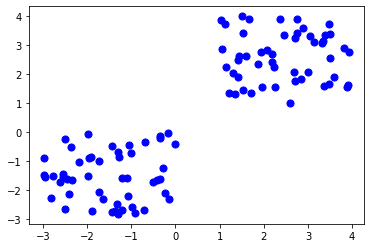

100
100


In [40]:
model = KmeansClustering()

model.generatedata()

initial
[(-2.97402476097253, -0.89279319288953), (-0.1744589863959668, -0.038037721646876244), (-1.2834588879131785, -0.8497246841389455)]
[[-2.4272391539464317, -1.3356529261188195], [2.4231780592682033, 2.578300474165063], [-0.9161868919006851, -1.635183600197493]]


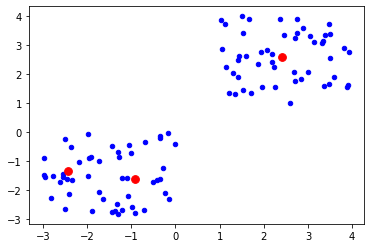

In [49]:
model.cluster(k=3,iters=30)

In [50]:
model.predict([[-1,2],[2,2],[-1,-1]])

1
1
2
